# Aula 05: Decision Tree e Random Forest
Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

## Leitura das bases

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/jeffsantos/Desktop/9DTSR/git/9DTSR/Machine Learning/Trabalhinhos/Trabalho Aula 05/titanic.csv")
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
df = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']].copy()
df

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_escalado = scaler.fit_transform(df)
#df_escalado = pd.DataFrame(df_escalado, columns=df.columns)
#df_escalado.fillna(df_escalado.mean(), inplace=True)
#df_escalado.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,0.273456,0.014151,0.0,0.125,0.0,1.0,1.0,0.0
1,0.473882,0.139136,1.0,0.125,0.0,0.0,0.0,1.0
2,0.323563,0.015469,1.0,0.000,0.0,1.0,1.0,1.0
3,0.436302,0.103644,1.0,0.125,0.0,0.0,1.0,1.0
4,0.436302,0.015713,0.0,0.000,0.0,1.0,1.0,0.0


In [ ]:
alvo = '2urvived'
variaveis = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[variaveis], df[alvo] ,test_size=0.2)

X_train.head(3)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
383,35.0,52.0000,1,1,0,1,2.0
1166,20.0,26.0000,1,1,0,2,2.0
514,24.0,7.4958,0,0,0,3,2.0


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
for k in range(2,20,1):
  tree = DecisionTreeClassifier(max_depth = k)
  tree.fit(X_train , y_train)
  acc_treino = round(tree.score(X_train, y_train), 2)
  preds = tree.predict(X_test)
  acc_teste = round(accuracy_score(y_test, preds), 2)
  print(k, acc_treino*100, acc_teste*100)

2 79.0 82.0
3 80.0 82.0
4 80.0 82.0
5 82.0 80.0
6 82.0 80.0
7 84.0 79.0
8 87.0 79.0
9 89.0 79.0
10 90.0 77.0
11 92.0 77.0
12 93.0 75.0
13 94.0 75.0
14 95.0 76.0
15 96.0 73.0
16 96.0 75.0
17 97.0 75.0
18 97.0 76.0
19 97.0 75.0


In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)
train_accuracy= tree.score(X_train,y_train)*100
train_accuracy

79.65616045845272

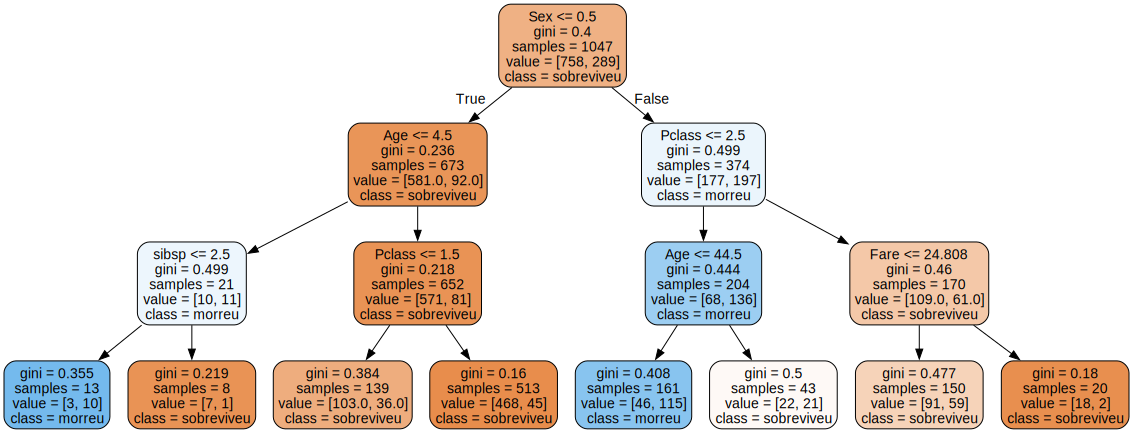

In [ ]:
dot_data = export_graphviz(tree, out_file=None,
                           filled=True, rounded=True,
                           feature_names=variaveis,
                           class_names=['sobreviveu', 'morreu'])

grafico = Source(dot_data)
grafico

<Axes: >

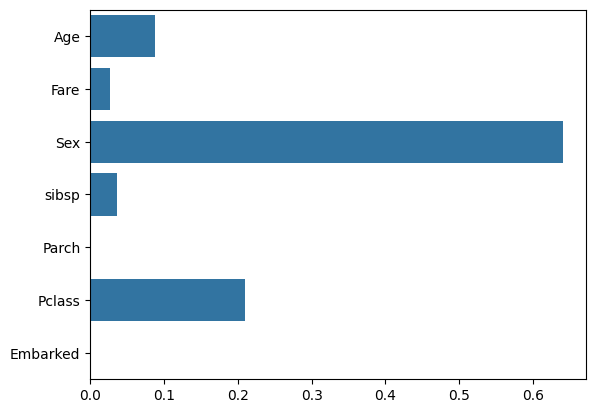

In [ ]:
import seaborn as sns
sns.barplot(x=tree.feature_importances_, y=variaveis)

[[169  40]
 [ 25  28]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       209
           1       0.41      0.53      0.46        53

    accuracy                           0.75       262
   macro avg       0.64      0.67      0.65       262
weighted avg       0.78      0.75      0.76       262



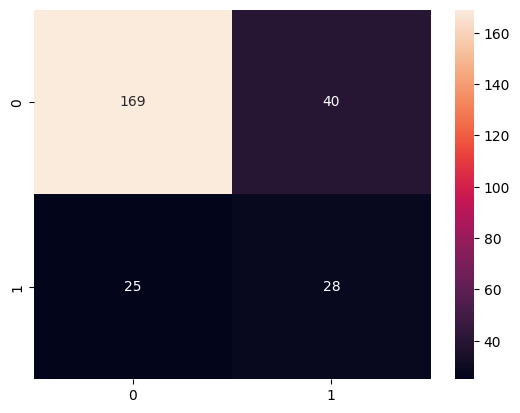

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
for k in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=k, max_depth=4)
    rf.fit(X_train, y_train)
    acc_treino = round(rf.score(X_train, y_train) * 100, 2)
    preds = rf.predict(X_test)
    acc_teste = round(accuracy_score(y_test, preds) * 100, 2)
    print(k, acc_treino, acc_teste)

1 88.35 75.19
2 88.35 77.48
3 90.74 75.57
4 91.31 80.53
5 93.98 75.19
6 94.08 77.1
7 95.13 78.24
8 95.61 79.01
9 95.32 77.48
10 95.13 79.77
11 95.8 76.72
12 96.28 80.15
13 95.99 79.39
14 95.89 80.92
15 96.18 80.92
16 96.18 79.01
17 96.37 77.86
18 96.28 79.39
19 96.75 79.01


In [ ]:
rf = RandomForestClassifier(n_estimators=4, max_depth=4, random_state = 42)
rf.fit(X_train, y_train)
acc_treino = round(rf.score(X_train, y_train) * 100, 2)
preds = rf.predict(X_test)
acc_teste = round(accuracy_score(y_test, preds) * 100, 2)
print(acc_treino, acc_teste)

79.37 80.15


<Axes: >

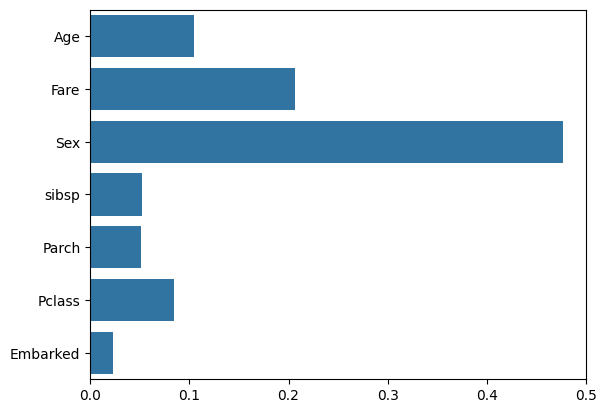

In [ ]:
sns.barplot(x=rf.feature_importances_, y=variaveis)

[[187  22]
 [ 30  23]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       209
           1       0.51      0.43      0.47        53

    accuracy                           0.80       262
   macro avg       0.69      0.66      0.67       262
weighted avg       0.79      0.80      0.80       262



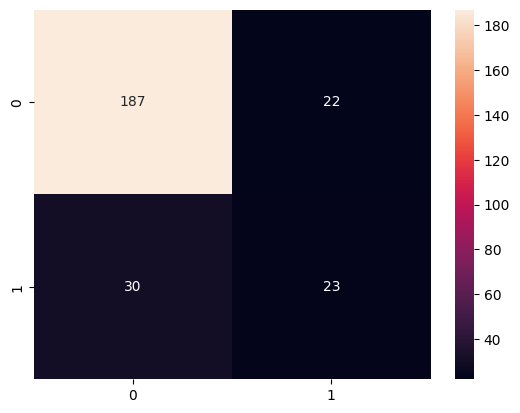

In [ ]:
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

# Conclusão
- Random Forest teve melhor acurácia geral, 80% vs 75% e melhor precisão para a classe de sobreviventes.
- Decision Tree teve melhor recall para a classe de sobreviventes, mas com mais falsos positivos.
- Random Forest é mais robusto por considerar mais árvores, sendo menos sugestivo a overfitting. Percebemos isso inclusive no gráfico de importância de cada variável, onde no Random Forest temos uma distribuição maior entre as variáveis.